<a href="https://colab.research.google.com/github/Rtniewi/cwiertniewicz-DataScience/blob/main/HW4/problem2_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Katrina Cwiertniewicz
# Introduction to Data Science IS1
# 10/5/2025
# Project 4: Problem 2 R
###The purpose of this assignment is to create contingency tables and answer questions using R and Python to analyze the datasets provided.

In [ ]:
library(readr)
nutritionDF  <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/refs/heads/main/HW4/nutrition_subset.csv");

Rows: 961 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): food item
dbl (3): weight_in_grams, saturated_fat, cholesterol

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


**Sort the data set by saturated_fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.**

In [ ]:
head(nutritionDF[order(nutritionDF$saturated_fat, decreasing=TRUE), c("food item", "saturated_fat")], 5)

food item,saturated_fat
<chr>,<dbl>
CHEESECAKE 1 CAKE,119.9
ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,118.3
YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,92.0
CREME PIE 1 PIE,90.1
LARD 1 CUP,80.4


Comparing food items of different sizes won't correctly display if a food item is high or low in saturated fat as serving size and saturated fat per gram is not taken into consideration.

**Create a new variable, saturated_fat_per_gram by dividing the amount of saturated fat by the weight in grams. Sort the data set by saturated_fat_per_gram and produce a listing of the five food items highest in saturated fat per fram. Which food has the most saturated fat per gram?**

Salted Butter has the most saturated fat per gram.

In [ ]:
n <- dim(nutritionDF)[1]
saturated_fat_per_gram = nutritionDF$saturated_fat/nutritionDF$weight_in_grams

nutritionDF$saturated_fat_per_gram <- saturated_fat_per_gram

head(nutritionDF[order(nutritionDF$saturated_fat_per_gram, decreasing=TRUE), c("food item", "saturated_fat_per_gram")], 5)

food item,saturated_fat_per_gram
<chr>,<dbl>
BUTTER; SALTED 1 TBSP,0.5071429
BUTTER; UNSALTED 1 TBSP,0.5071429
BUTTER; SALTED 1/2 CUP,0.5053097
BUTTER; UNSALTED 1/2 CUP,0.5053097
BUTTER; SALTED 1 PAT,0.5000000


**Standardize(zero mean) the field saturated_fat_per gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_fat_per_gram**

In [ ]:
nutritionDF$scaled_saturated_fat_per_gram <- scale(x = nutritionDF$saturated_fat_per_gram)

summary(nutritionDF$scaled_saturated_fat_per_gram)

       V1         
 Min.   :-0.5620  
 1st Qu.:-0.5620  
 Median :-0.4411  
 Mean   : 0.0000  
 3rd Qu.: 0.1539  
 Max.   : 7.1068  

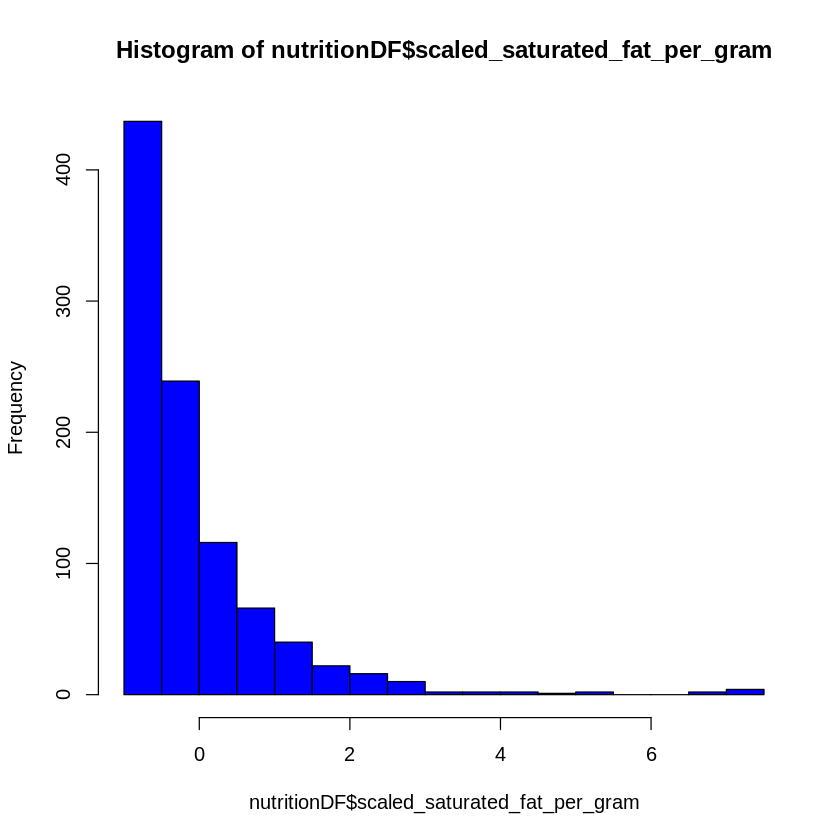

In [ ]:
hist(nutritionDF$scaled_saturated_fat_per_gram, col="blue")

In [ ]:
# Determine the three sigma rule first for the scaled_saturated_fat_per_gram attribute

max_three_sigma_rule <- (nutritionDF$scaled_saturated_fat_per_gram > 3 )

# Number of Outliers
cat ("There are", sum(max_three_sigma_rule), "outliers \n\n")

# Max Outliers
max_outlier_nutritionDF <- nutritionDF[max_three_sigma_rule ,]

# Display Outliers
max_outlier_nutritionDF[order(max_outlier_nutritionDF$scaled_saturated_fat_per_gram, decreasing=TRUE), c("food item", "saturated_fat_per_gram", "scaled_saturated_fat_per_gram")]

There are 15 outliers 



food item,saturated_fat_per_gram,scaled_saturated_fat_per_gram
<chr>,<dbl>,"<dbl[,1]>"
BUTTER; SALTED 1 TBSP,0.5071429,7.106775
BUTTER; UNSALTED 1 TBSP,0.5071429,7.106775
BUTTER; SALTED 1/2 CUP,0.5053097,7.079055
BUTTER; UNSALTED 1/2 CUP,0.5053097,7.079055
BUTTER; SALTED 1 PAT,0.5000000,6.998763
BUTTER; UNSALTED 1 PAT,0.5000000,6.998763
LARD 1 TBSP,0.3923077,5.370282
LARD 1 CUP,0.3921951,5.368580
IMITATION CREAMERS; POWDERED 1 TSP,0.3500000,4.730522


In [ ]:
# Determine the three sigma rule first for the scaled_saturated_fat_per_gram attribute

low_three_sigma_rule <- (nutritionDF$scaled_saturated_fat_per_gram < -3)

# Number of Outliers
cat ("There are", sum(low_three_sigma_rule), "outliers \n\n")

# Max Outliers
low_outlier_nutritionDF <- nutritionDF[low_three_sigma_rule ,]

# Display Outliers
low_outlier_nutritionDF[order(low_outlier_nutritionDF$scaled_saturated_fat_per_gram, decreasing=FALSE), c("food item", "saturated_fat_per_gram", "scaled_saturated_fat_per_gram")]

There are 0 outliers 



food item,saturated_fat_per_gram,scaled_saturated_fat_per_gram
<chr>,<dbl>,"<dbl[,1]>"


These values were the lowest of the z-mean scores however, there were no outliers on the other side with z-scores lower than -3.

**Density Plot for Saturated Fat Per Gram**

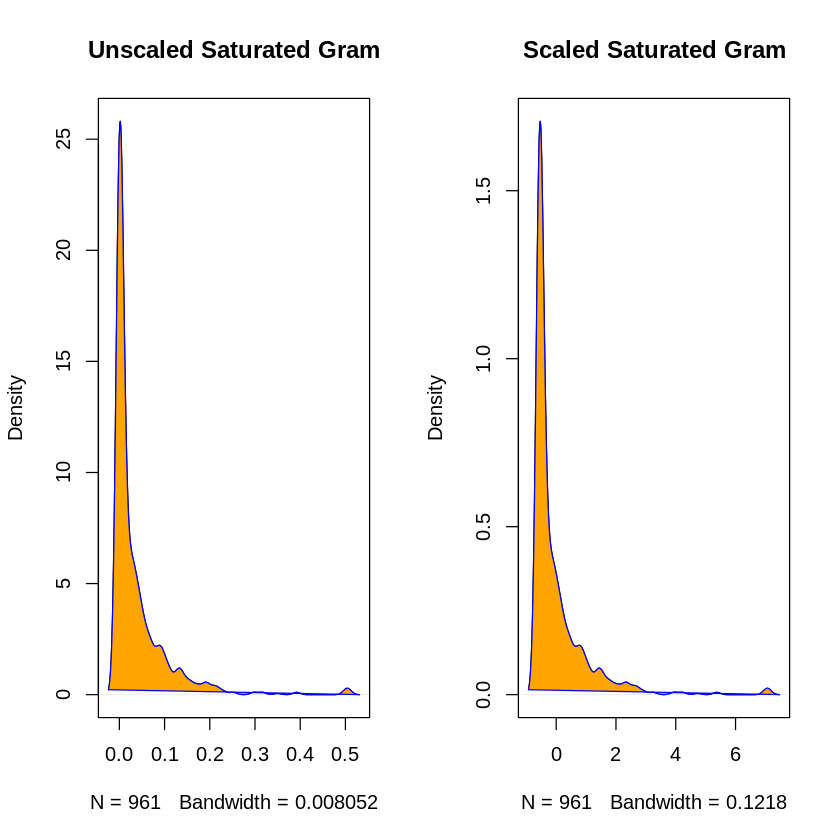

In [ ]:
par(mfrow=c(1, 2))


# Kernel Density Plot
d1 <- density(nutritionDF$saturated_fat_per_gram)

# plots the results
plot(d1, main="Unscaled Saturated Gram")

# plots the results (filled)
polygon(d1, col="orange", border="blue")


# Kernel Density Plot
d2 <- density(nutritionDF$scaled_saturated_fat_per_gram)

# plots the results
plot(d2, main="Scaled Saturated Gram")

# plots the results (filled)
polygon(d2, col="orange", border="blue")



Are there any missing values? If so, impute as necessary and explain your approach.

In [ ]:
sum(is.na(nutritionDF$`food item`))
sum(is.na(nutritionDF$weight_in_grams))
sum(is.na(nutritionDF$saturated_fat))
sum(is.na(nutritionDF$cholesterol))

[1] 0

[1] 0

[1] 0

[1] 0

Missing values were checked and there were no missing values.

**Standardize (zero mean) the numeric variables, and determine if there are any outliers.**

**Outliers for Weight in Grams**

In [ ]:
# Standardized Weight in Grams
nutritionDF$scaled_weight_in_grams <- scale(x = nutritionDF$weight_in_grams)

summary(nutritionDF$scaled_weight_in_grams)

# Determine the three sigma rule first for the Weight in Grams attribute

three_sigma_rule <- (nutritionDF$scaled_weight_in_grams < -3 |
                     nutritionDF$scaled_weight_in_grams > 3 )

cat ("\n")
# Number of Outliers
cat ("There are", sum(three_sigma_rule), "outliers \n\n")


cat("The scaled age values that are outliers: \n\n")
nutritionDF$scaled_weight_in_grams[which(three_sigma_rule)]

       V1         
 Min.   :-0.8471  
 1st Qu.:-0.6674  
 Median :-0.2070  
 Mean   : 0.0000  
 3rd Qu.: 0.3899  
 Max.   : 7.9165  


There are 22 outliers 

The scaled age values that are outliers: 



[1] 4.323765 6.887585 5.460714 3.840561 3.567693 5.443659 7.882415 5.449344
 [9] 4.323765 5.108259 5.631256 3.925832 5.449344 5.199215 5.381127 5.904124
[17] 4.522731 4.522731 4.522731 4.522731 4.323765 7.916524

**Outliers for Saturated Fat**

In [ ]:
# Standardized Saturated Fat
nutritionDF$scaled_saturated_fat<- scale(x = nutritionDF$saturated_fat)

summary(nutritionDF$scaled_saturated_fat)

# Determine the three sigma rule first for the Saturated Fat attribute

three_sigma_rule <- (nutritionDF$scaled_saturated_fat < -3 |
                     nutritionDF$scaled_saturated_fat > 3 )

cat ("\n")
# Number of Outliers
cat ("There are", sum(three_sigma_rule), "outliers \n\n")


cat("The scaled age values that are outliers: \n\n")
nutritionDF$scaled_saturated_fat[which(three_sigma_rule)]

       V1         
 Min.   :-0.3711  
 1st Qu.:-0.3711  
 Median :-0.3339  
 Mean   : 0.0000  
 3rd Qu.:-0.0640  
 Max.   :10.7882  


There are 20 outliers 

The scaled age values that are outliers: 



[1]  4.059096 10.788208  4.468613  4.803673  5.771622  4.077710  3.184218
 [8]  8.191497  6.264904  3.500663 10.639293  8.014660  4.729215  3.928795
[15]  4.943281  4.943281  7.111860  3.025996  3.277290  4.403463

**Outliers for Cholesterol**

In [ ]:
# Standardized Cholesterol
nutritionDF$scaled_cholesterol <- scale(x = nutritionDF$cholesterol)

summary(nutritionDF$scaled_cholesterol)

# Determine the three sigma rule first for the Cholesterol attribute

three_sigma_rule <- (nutritionDF$scaled_cholesterol < -3 |
                     nutritionDF$scaled_cholesterol > 3 )

cat ("\n")
# Number of Outliers
cat ("There are", sum(three_sigma_rule), "outliers \n\n")


cat("The scaled age values that are outliers: \n\n")
nutritionDF$scaled_cholesterol[which(three_sigma_rule)]

       V1         
 Min.   :-0.2714  
 1st Qu.:-0.2714  
 Median :-0.2714  
 Mean   : 0.0000  
 3rd Qu.:-0.1046  
 Max.   :16.8426  


There are 17 outliers 

The scaled age values that are outliers: 



[1]  3.146420  4.355150  8.148063  5.063716 16.842585  8.898309  4.471855
 [8]  4.330142  4.713601  9.590203  4.530208  5.188757  6.872644  4.805298
[15]  3.696601  5.030372  5.588889

# **Findings**

After calculating saturated fat per gram, there is a major discrepancy between data values. Without a designated scale to determine by weight how much each nutritional value makes up of a food item, the items are being compared disproportionally. This may be why we see about 20 outliers for each nutritional point, as higher values seem like outliers but may not be being compared correctly by weight. To fix this, each nutritional value should be calculated by gram to remove this calculation issue.
